#SBA Guaranteed Loans

##Business Problem

### Commercial context and motivation

The U.S. SBA (United States Small Business Administration) was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market. 

Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. One way SBA assists these small business enterprises is through a loan guarantee program which is designed to encourage banks to grant loans to small businesses. SBA acts much like an insurance provider to reduce the risk for a bank by taking on some of the risk through guaranteeing a portion of the loan. In the case that a
loan goes into default, SBA then covers the amount they guaranteed.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small
businesses and/or start-ups that have defaulted on their SBA-guaranteed loans. The rate of default on these loans has been a source of controversy for decades. Conservative economists believe that credit markets perform efficiently
without government participation. Supporters of SBA- guaranteed loans argue that the social benefits of job creation by those small businesses receiving government- guaranteed loans far outweigh the costs incurred from
defaulted loans.

Since SBA loans only guarantee a portion of the entire loan
balance, banks will incur some losses if a small business defaults
on its SBA-guaranteed loan. Therefore, banks are still faced
with a difficult choice as to whether they should grant such a
loan because of the high risk of default. One way to inform
their decision making is through analyzing relevant historical
data such as the datasets provided here.



Nowadays, the SBA decided to modernize and set up a Data Analytics team to improve its credit approval system. We are data scientists who are part of that team.


### Target

The business problem is to decide if a loan can be granted, with a reasonable probability that the requesting company can cancel it without inconvenience.

###Business Target

What are the characteristics of the companies that best predict whether or not the company will have problems repaying the loan? What happens if a company takes several loans, is it more likely that one will have problems? How does the borrowing bank and the line of credit influence? Is there a relationship with the term of the loan? And with the year the loan was made? (Let's keep in mind that this last question is related to the economic and political context.).

##Context and analytical approach

The aim is to implement a machine learning model that, with the different values of the dataset fields, predicts if the company had difficulties in paying the loan, which can be called in a shorter way as "defaulted loan".

###Dataset Fields

The fields found in the dataset are the following:

**- LoanNr_ChkDgt**: Identifier – Primary key

**- Name**: Borrower name

**- City**: Borrower city

**- State**: Borrower state (U.S.)

**- Zip**: Borrower zip code

**- Bank**: Bank name

**- BankState**: State of the bank branch

**- NAICS**:  North American industry classification system code

**- ApprovalDate**: Date SBA commitment issued

**- ApprovalFY**: Fiscal year of commitment

**- Term**: Loan term in months

**- NoEmp**: Number of business employees

**- NewExist**: 1=Existing business, 2=New business

**- CreateJob**: Number of jobs created

**- RetainedJob**: Number of jobs retained

**- FranchiseCode**: Franchise code, (00000 or 00001)=No franchise

**- UrbanRural**: 1=Urban, 2=rural, 0=undefined

**- RevLineCr**: Revolving line of credit: Y=Yes, N=No

**- LowDoc**: LowDoc Loan Program: Y D Yes, N D No

**- ChgOffDate**: The date when a loan is declared to be in default

**- DisbursementDate**: Payment date (delivery of the loan)

**- DisbursementGross**: Gross amount disbursed/paid (per loan delivery)

**- BalanceGross**: Gross amount pending return (at the time of preparation of the dataset)

**- MIS_Status**: Loan status: Loan status charged off=CHGOFF, Paid
in full=PIF

**- ChgOffPrinGr**: Charged-off amount (Amount canceled (not refunded))

**- GrAppv**: Gross amount of loan approved by bank

**- SBA_Appv**: SBA’s guaranteed amount of approved
loan

Since the dataset is labeled (the MIS_Status field indicates whether or not there were any issues with the loan), it is a supervised learning problem, more specifically, classification. The category we want to assign to future loans corresponds to the target variable, MIS_Status.

### Hypothesis


The fields that we believe may be most relevant to the company requesting the loan are: 'State', 'NAICS', 'NoEmp', 'NewExist', 'UrbanRural'.

Regarding the bank and the line of credit that seem most relevant to us are: 'BankState', 'RevLineCr', 'DisbursementGross', 'GrAppv', 'SBA_Appv'.

To see if there is a relationship with terms, we are going to study the 'Term' field.

Regarding the relationship with the years of the loans, we believe that the fields 'DisbursementDate', 'ApprovalDate', 'ApprovalFY' and 'ChgOffDate' are relevant, although the first three are probably very similar.

## Exploratory Data Analysis (EDA)

### First a contact with the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
pd.options.display.max_columns = 500


In [ ]:
from google.colab import drive # We mount a Google Drive folder where the dataset is.
drive.mount('/content/drive', force_remount=True)

path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"


Mounted at /content/drive


We load the dataset.

In [ ]:
loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


We see that column 9 has several different types, let's take a better look at it.

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

The info statement doesn't detect the problem, but we can look better:

In [ ]:
for column in loans.columns:
  print(column, ' ---> ', pd.api.types.infer_dtype(loans[column]))

LoanNr_ChkDgt  --->  integer
Name  --->  string
City  --->  string
State  --->  string
Zip  --->  integer
Bank  --->  string
BankState  --->  string
NAICS  --->  integer
ApprovalDate  --->  string
ApprovalFY  --->  mixed-integer
Term  --->  integer
NoEmp  --->  integer
NewExist  --->  floating
CreateJob  --->  integer
RetainedJob  --->  integer
FranchiseCode  --->  integer
UrbanRural  --->  integer
RevLineCr  --->  string
LowDoc  --->  string
ChgOffDate  --->  string
DisbursementDate  --->  string
DisbursementGross  --->  string
BalanceGross  --->  string
MIS_Status  --->  string
ChgOffPrinGr  --->  string
GrAppv  --->  string
SBA_Appv  --->  string


So we corroborate that there is a problem. It would have to be a date or an integer.

-------------------------------------------------------------------------------------

Looking back at the output of the info command, we see that there are several columns with null values, although they are few in percentage terms. The only exception is the ChgOffDate column, which has quite a few and is logical, because this column is the date on which the customer began to default on the debt and therefore only has values if the customer had problems paying.
The columns with null values are: Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status.

Let's explore the data a bit more:

In [ ]:
loans.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,NaN,NaN,NaN,4772612310.59431,2538175037.45304,1000014003.0,2589757508.5,4361439006.0,6904626504.75,9996003010.0
Name,899150,779583,SUBWAY,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,899134,32581,LOS ANGELES,11558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,899150,51,CA,130619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,899164.0,NaN,NaN,NaN,53804.391241,31184.159152,0.0,27587.0,55410.0,83704.0,99999.0
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,897598,56,CA,118116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,899164.0,NaN,NaN,NaN,398660.950146,263318.31276,0.0,235210.0,445310.0,561730.0,928120.0
ApprovalDate,899164,9859,7-Jul-93,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,899164.0,70.0,2006.0,76040.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loans.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


We notice that the NAICS column has zeros. Zeros are not valid industry classification codes, so this is the same as having nulls. Let's see how many zeros there are in that column.

In [ ]:
(loans['NAICS']==0).sum()

201948

That's a little over 22% of the rows, so that field has a hefty value of nulls.

-------------------------------------------------------------------------------------

There are several columns that have monetary values and to work with them we have to pass them to numerical format. These columns are: DisbursementGross, BalanceGross, GrAppv y SBA_Appv.

-------------------------------------------------------------------------------------

Another thing to note is that the ApprovalDate, DisbursementDate and ChgOffDate columns are date data, but one can see that in the dataframe they are strings:

In [ ]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))


string
string
string


In [ ]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(5)

,ApprovalDate,DisbursementDate,ChgOffDate
790293,7-Jun-95,31-Oct-95,NaN
641775,12-Jun-03,30-Nov-03,NaN
699577,15-Mar-04,30-Apr-04,NaN
232177,16-Aug-07,31-Oct-07,14-Aug-14
708955,21-Apr-04,30-Apr-04,NaN


If we are going to use them later, we would have to convert them. 

--------------------------------------------------------------------------------------------

NAICS classification code numbers have positional significance. The first two digits designate the largest business sector, the third digit designates the subsector, the fourth digit designates the industry group, the fifth digit designates NAICS industries, and the sixth digit designates national industries. The code table for the first two digits is as follows:

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

Therefore we will find it convenient to isolate those first two digits in a new column. Regarding the third, it should be analyzed.

--------------------------------------------------------------------------------------------

One thing we noticed is that the 'RevLineCr' field has 18 distinct values, when in reality it should have only two, 'Y' and 'N'.

In [ ]:
loans['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [ ]:
loans['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

We don't know how to interpret most of the categories, the 0's represent a large part of the data.

--------------------------------------------------------------------------------------------

Another thing we see is that it would be useful to have the Target variable as a boolean. But for now we won't because we don't want to touch anything in the original dataframe.

--------------------------------------------------------------------------------------------

Let's see if there are duplicate rows.

In [ ]:
loans.duplicated().sum()

0

We see that there are no duplicate rows. However, this topic does not end here because it turns out that what causes there to be no duplicate rows is the identifier column, 'LoanNr_ChkDgt', but if that column is removed, there are identical entries. 

In [ ]:
loans.duplicated(subset= ['LoanNr_ChkDgt']).sum()

0

In [ ]:
loans[loans.columns.difference(['LoanNr_ChkDgt'])].duplicated().sum()

128

In [ ]:
loans[loans[loans.columns.difference(['LoanNr_ChkDgt'])].duplicated(keep=False)].head(8)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
240,1001905008,REYNOLDS H20 PLUS,WEST READING,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,4-Dec-97,1998,60,46,1.0,0,0,21400,0,0,N,NaN,28-Feb-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
243,1001915000,REYNOLDS H20 PLUS,WEST READING,PA,19611,WELLS FARGO BANK NATL ASSOC,PA,0,4-Dec-97,1998,60,46,1.0,0,0,21400,0,0,N,NaN,28-Feb-98,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
35622,1271744001,"ARCHITECTURAL ORNAMENTS, INC.",KANSAS CITY,MO,64126,"UMB BANK, NATIONAL ASSOCIATION",MO,327331,22-May-97,1997,12,16,1.0,0,0,1,0,N,N,NaN,31-Jan-98,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$40,000.00"
35632,1271864002,"ARCHITECTURAL ORNAMENTS, INC.",KANSAS CITY,MO,64126,"UMB BANK, NATIONAL ASSOCIATION",MO,327331,22-May-97,1997,12,16,1.0,0,0,1,0,N,N,NaN,31-Jan-98,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$40,000.00"
43040,1334174005,NETEC,CHELSEA,MA,2150,STATE STREET BK & TR CO,MA,0,10-Jun-97,1997,5,26,1.0,0,0,1,0,N,N,NaN,31-Oct-97,"$46,771.00",$0.00,P I F,$0.00,"$46,771.00","$35,078.00"
43054,1334264008,NETEC,CHELSEA,MA,2150,STATE STREET BK & TR CO,MA,0,10-Jun-97,1997,5,26,1.0,0,0,1,0,N,N,NaN,31-Oct-97,"$46,771.00",$0.00,P I F,$0.00,"$46,771.00","$35,078.00"
61200,1462815008,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,82,2.0,82,0,0,2,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"
61201,1462835003,"Meathead Movers, Inc.",San Luis Obispo,CA,93401,COAST NATIONAL BANK,CA,484210,20-Sep-05,2005,12,82,2.0,82,0,0,2,N,N,NaN,28-Feb-06,"$4,000.00",$0.00,P I F,$0.00,"$4,000.00","$2,000.00"


These identical entries are errors in having indexed them as different loans and after this first analysis they will be deleted.

--------------------------------------------------------------------------------------------

Let's make some graphics related to the questions posed in the business problem.

#### Variables related to the company

Is there any relationship between the number of employees and problems in paying the loan?

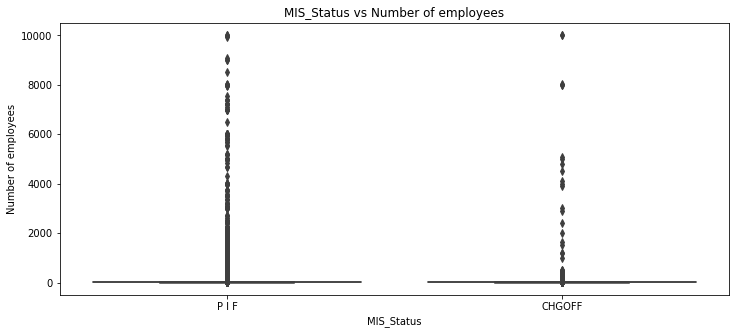

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loans)  
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

There are many outliers and the graphic is not very understandable. Let's remove the outliers from the graph.

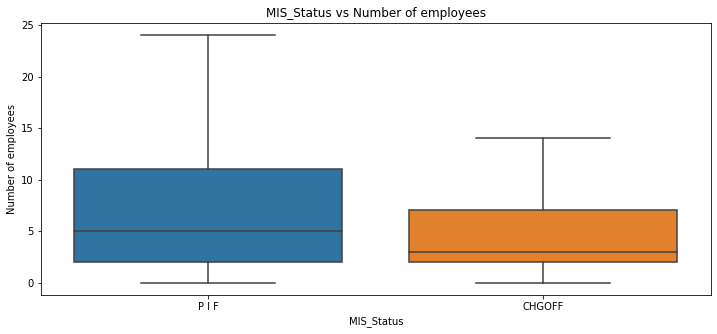

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loans,  showfliers = False)  
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

Recall that those who had problems are those classified as 'CHGOFF', and those who did not have problems are those classified as 'P I F' (paid in full).

We see that, taking outliers, the companies that did not present problems when paying have more employees. This tells us that the greater the number of employees, the more likely payment is without a problem.

We estimate, in principle, that this is because the companies with the largest number of employees are better established. Which leads us to wonder what relationship there is between failing to comply and the company being new. The NewExist field is 1 if the company existed before the loan and 2 if it is new.
 

Let's discuss the percentages of MIS_Status values based on whether it is new or not.

In [ ]:
loans[loans['NewExist']==2]['MIS_Status'].value_counts(normalize=True)

P I F     0.812452
CHGOFF    0.187548
Name: MIS_Status, dtype: float64

In [ ]:
loans[loans['NewExist']==1]['MIS_Status'].value_counts(normalize=True)

P I F     0.828868
CHGOFF    0.171132
Name: MIS_Status, dtype: float64

Graphically:

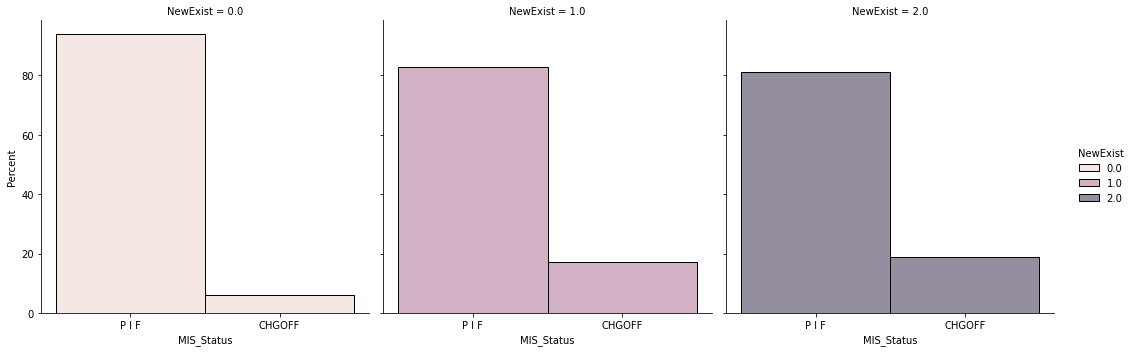

In [ ]:
sns.displot(data=loans, x="MIS_Status", col="NewExist", hue="NewExist", stat='percent', common_norm=False);


We see that there is very little difference in default rates between new and existing businesses. Which rules out the above conjecture.

On the other hand, we see that the NewExist parameter also has 0 values, which we associate with the fact that said parameter is not completed. How many 0 values are in that column?

In [ ]:
loans[loans['NewExist']==0].shape[0] #shape[0] returns the number of rows, that is, the number of records where NewExist is equal to 0.

1034

This is a small number compared to the total. We see striking that there is a significant difference between the companies that are not classified and those that are classified. This difference cannot be attributed to random error:

In [ ]:
# We do an hypothesis test

#We create a column 'MIS_Status_numeric' for analysis. Since we don't want to 
#touch the original dataset in this first analysis, we do it on a copy.
loans_copy = loans.copy()
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status']=='CHGOFF'#This new column is 
#True if there were problems with the payment, and False if not.
loans['MIS_Status_numeric'] = loans_copy['MIS_Status_numeric'].astype(int) #We pass 
#this field into binary.

sample_0 = loans_copy[loans_copy['NewExist']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans_copy['NewExist']!=1]['MIS_Status_numeric']
# sample_0_mean = np.mean(sample_0)
# sample_1_mean = np.mean(sample_1)
# sample_0_std = np.std(sample_0)
# sample_1_std = np.std(sample_1)
# print("sample_0 mean value:",sample_0_mean)
# print("sample_1 mean value:",sample_1_mean)
# print("sample_0 std value:", sample_0_std)
# print("sample_1 std value:", sample_1_std)

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 3.7004214503707636e-25
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


The hypothesis test tells us that the difference is real. We do not have an explanation for this difference at this time.

With respect to being an urban or rural company,

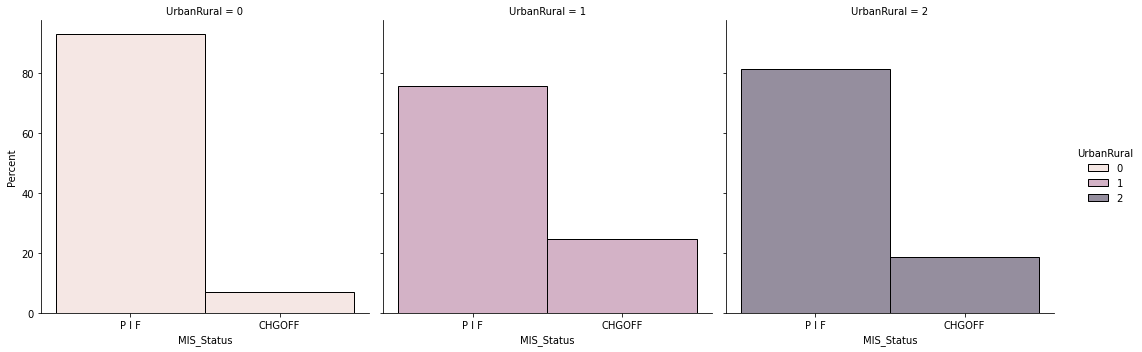

In [ ]:
sns.displot(data=loans, x="MIS_Status", col="UrbanRural", hue="UrbanRural", stat='percent', common_norm=False);

We do not see a significant difference in whether it is urban or not. We do see a difference if it is indefinite. This difference is also not due to chance:

In [ ]:
sample_0 = loans_copy[loans['UrbanRural']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans['UrbanRural']!=1]['MIS_Status_numeric']
# sample_0_mean = np.mean(sample_0)
# sample_1_mean = np.mean(sample_1)
# sample_0_std = np.std(sample_0)
# sample_1_std = np.std(sample_1)
# print("sample_0 mean value:",sample_0_mean)
# print("sample_1 mean value:",sample_1_mean)
# print("sample_0 std value:", sample_0_std)
# print("sample_1 std value:", sample_1_std)

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.0
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


###First insights and conclusions

*   The LoanNr_ChkDgt column is an id so it must be removed.
*   Column 9, that is, ApprovalFY, has multiple types. It should be a date format (if it is date) or integer (if it is year).
*   Columns Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status have null values.

    The Name, Bank, and ChgOffDate columns we don't think are important and will probably remove them. The first 2 because they have too many different values and we don't think they can be included in a model. The third clearly has no predictive value because it indicates the date the default started (if any).

     On the other hand, MIS_Status is critical, and all rows with null MIS_Status should be removed as it is the target variable.

*   The NAICS column has zeros. The zeros in this case represent null values. They are more than 22% of the cases.
*   The DisbursementGross, BalanceGross, GrAppv, and SBA_Appv columns are currency values and should be passed to numbers (int or float).
*   The ApprovalDate, DisbursementDate, and
ChgOffDate is date data, but they are as strings. In any case, since they are date variables, they are influenced by contextual and unpredictable issues, they will not help us to make a predictive model. Before assembling the model we are going to remove them.
*   There are rows with identical data, rows with duplicate data will be removed.
*   The first two digits of the NAICS column indicate the company's industry sector and are to be taken as a new column. We don't think the original NAICS column is more useful and we are going to remove it.
*   The RevLineCr column takes 18 different values when it should take 2. It would have to be eliminated or join all the values that are not the two expected as one because it is not understood if they are errors or mean something.
*   The target variable, MIS_Status, would be better having it boolean, it would have to be transformed.
*   There is a clear relationship between the number of employees and the risk of non-payment. The greater the number of employees, the less risk. This relationship is not due to the company being new or not.
*   Loans where the NewExist variable has a value of 0, which is equivalent to not being catalogued, have less risk of default than those with this variable well classified.
*   Whether the company is rural or not does not have much impact on payments. It does have some incidence if it is categorized as indefinite.
*   It is necessary to do all the mentioned transformations to be able to graph and try to answer most of the questions.


### Pending transformations of the first contact

Let's apply the transformations that we saw necessary in the first part of the EDA.

Looking at the first values of the 'ApprovalFY' column we see that it should be an integer since it is the number of the fiscal year of loan approval. But there is a problem, you can check that NOT all the rows are a pure year. So let's first load that column as a string and then clean up the errors.

In [ ]:
loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv", dtype={'ApprovalFY': str})

In [ ]:
print (loans[~loans['ApprovalFY'].str.isdigit()].ApprovalFY) #These are all the rows where the field is not a pure number.

699732    1976A
704030    1976A
705375    1976A
710381    1976A
713245    1976A
748029    1976A
751519    1976A
769515    1976A
775002    1976A
775430    1976A
775978    1976A
776367    1976A
780120    1976A
781090    1976A
784351    1976A
788539    1976A
788661    1976A
793733    1976A
Name: ApprovalFY, dtype: object


In [ ]:
loans['ApprovalFY']=loans['ApprovalFY'].str.replace("1976A","1976")    
loans['ApprovalFY']=loans['ApprovalFY'].astype('int')

Now that problem has disappeared, the ApprovalFY field has only one type:

In [ ]:
for column in loans.columns:
  print(column, ' ---> ', pd.api.types.infer_dtype(loans[column]))

LoanNr_ChkDgt  --->  integer
Name  --->  string
City  --->  string
State  --->  string
Zip  --->  integer
Bank  --->  string
BankState  --->  string
NAICS  --->  integer
ApprovalDate  --->  string
ApprovalFY  --->  integer
Term  --->  integer
NoEmp  --->  integer
NewExist  --->  floating
CreateJob  --->  integer
RetainedJob  --->  integer
FranchiseCode  --->  integer
UrbanRural  --->  integer
RevLineCr  --->  string
LowDoc  --->  string
ChgOffDate  --->  string
DisbursementDate  --->  string
DisbursementGross  --->  string
BalanceGross  --->  string
MIS_Status  --->  string
ChgOffPrinGr  --->  string
GrAppv  --->  string
SBA_Appv  --->  string


----------------------------------------------------------

Let's throw out the id column:

In [ ]:
loans.drop(['LoanNr_ChkDgt'], axis=1, inplace=True);

----------------------------------------------------------

Now we convert the currency fields 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' into float format.

In [ ]:
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']] = (loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]).replace({"[\$]": "", "[,]": ""}, regex=True) 
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]=loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].astype('float')

Now, the fields 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' are in correct format:


In [ ]:
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,60000.0,0.0,60000.0,48000.0
1,40000.0,0.0,40000.0,32000.0
2,287000.0,0.0,287000.0,215250.0
3,35000.0,0.0,35000.0,28000.0
4,229000.0,0.0,229000.0,229000.0


----------------------------------------------------------

Let's delete duplicate entries.

In [ ]:
loans.duplicated().sum()

128

In [ ]:
loans.drop_duplicates(inplace=True)

In [ ]:
loans.duplicated().sum()

0

----------------------------------------------------------

Let's create some fields.

In [ ]:
loans['Sector'] = (loans['NAICS'].astype(str).str[:2])#The str[:2] command extracts the first two digits,
#but it has to be a string, so we put .astype(str) before it.

In [ ]:
loans['Subsector'] = (loans['NAICS'].astype(str).str[2:3])#In the variables engineering section we are 
#going to analyze if it is useful to stay with the sector and sub-sector, or if it is better to stay only with 
#the sector.

You can see that the zeros in the 'NAICS' column translate to 0s for 'Sector' and empty strings for 'Subsector' (empty string is not the same as null). Also if there is a zero in 'Sector' it is because there was a zero in 'NAICS', and if there is a '' in 'Sector' it is because there was a zero in 'NAICS'.

In [ ]:
# aux=loans[loans['NAICS']==0][['NAICS', 'Sector', 'Subsector']] #We create a
# #auxiliay datataframe with the rows where NAICS column is equal to zero.
# print(aux.info())
# #Them, there are 201948 zeros in NAICS.
# print(aux.head(5))
# print(aux['NAICS'].equals(aux['Sector'].astype(int)) #We can't compare them directly
# #because 'NAICS' is a int and 'Sector' is a string.)
# #So, every zero in NAICS is a zero of Sector.
# print(loans[loans['Sector']=='0'])['Sector'].count())
# #There are 201948 zeroes in Sector, the same value that is in NAICS column. So, 
# #there are not more zeroes in Sector than in NAICS.
# print(aux['Subsector'].isnull().sum()) 
# #So, there are not nulls in Subsector.
# print((aux['Subsector']=='').sum()) #There are 201948 '' in Subsector. So the 
# #zeroes in NAICS became '' in Subsector.
# print((loans[loans['Subsector']==''])['Subsector'].count())
# #There are 201948 ''values in Subsector. So, #here are not more '' in Sector 
# #than zeores in NAICS.

We are not going to use the NAICS column for anything else so we can throw it away. (The only problem would have been not being able to identify the 'NAICS' zeroes, but we just mentioned that the 'NAICS' zeroes translate exactly to zeros in 'Sector' and '' in 'Subsector').

In [ ]:
loans.drop(['NAICS'], axis=1,inplace=True)

----------------------------------------------------------

Let's convert the 'MIS_Status' column in a boolean column. In order not to have a problem with some commands, we are going to set them with the values 0 and 1.We are going to call this new column 'Default', so that the value 1 means that the loan had problems in its payment.

In [ ]:
loans['Default'] = loans['MIS_Status']=='CHGOFF'#This new column is True if there were problems with the payment, and False if not.
loans['Default'] = loans['Default'].astype(int) #We go to binary.

Because of the way we created this new column, the null values of 'MIS_Status' are zeros of 'Default', but in reality they should be nulls of 'Default' as well. Also remember that rows with null values in 'Default' must be deleted, so we can directly delete those rows and then the values of 'Default' will be correct.

In [ ]:
loans.dropna(axis=0, subset=['MIS_Status'], inplace=True)

Now, we can delete 'MIS_Status' column .

In [ ]:
loans.drop(['MIS_Status'], axis=1,inplace=True);

----------------------------------------------------------

Although the ApprovalDate, DisbursementDate, and ChgOffDate will be eliminated later because it does not have a predictive value. It will be interesting to graph them to see what incidence the dates on which the events occur have. So let's transform them to date format. Let's see first what format they have.

In [ ]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))

string
string
string


In [ ]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(5)

,ApprovalDate,DisbursementDate,ChgOffDate
626106,11-Feb-94,30-Apr-94,NaN
799058,27-Jul-95,14-May-97,NaN
835507,30-Jun-05,31-Aug-06,NaN
658246,29-Aug-03,30-Nov-03,NaN
570546,19-Aug-02,31-Dec-02,14-Jun-06


Let's remember that the 'ChgOffDate' column only has content on the loans that had no problems.

In [ ]:
print(loans[loans['Default']==True].ChgOffDate.sample(15));

658912    18-Dec-06
769859    13-Mar-09
338992    15-May-91
182617    15-Dec-10
94317     18-Feb-10
59994      3-Apr-07
623100    28-Feb-06
43152     29-Jan-01
37851      3-Aug-10
689882    31-Dec-07
331211     3-Aug-06
35624     26-Feb-07
198376     1-Jun-11
204206    28-Jan-11
177297    27-Jul-10
Name: ChgOffDate, dtype: object


The three columns have a conflicting format because they contain the last two digits of the year, which does not allow them to be transformed directly. Doing a little analysis you can see that the loans are not older than 1966: 

In [ ]:
print(loans['ApprovalFY'].min())
print(loans['ApprovalFY'].max())

1966
2014


So it is not difficult to know what should be put in the first two digits of the year.

We make a function that reformats those fields to proper dates.


In [ ]:
def clean_date(date_str): 
  '''If a cell is in the format DD-MM-YY where YY are the last two digits of a 
  year between 1924 and 2023, transforms it to DD-MM-YYYY.'''
  if pd.isna(date_str)!=True: #If the string is null, we do nothing.
    date_list = date_str.split('-') 
    if (len(date_list[2])<3):

      if int(date_list[2])<23:
        date_list[2] = '20' + date_list[2]
      else:
        date_list[2] = '19' + date_list[2]
  else:
    date_list=''
  return '-'.join(date_list)

Let's apply this function to the dates fields.

In [ ]:
loans['ApprovalDate']=loans['ApprovalDate'].apply(clean_date)
loans['ApprovalDate'] = pd.to_datetime(loans['ApprovalDate'], format='%d-%b-%Y')

In [ ]:
loans['DisbursementDate']=(loans['DisbursementDate']).apply(clean_date)
loans['DisbursementDate'] = pd.to_datetime(loans['DisbursementDate'], format='%d-%b-%Y', errors='coerce') #The option 
#errors='coerces' is set to be able to treat nulls, in the previous conversion it was not necessary because it 
#did not have nulls.

In [ ]:
loans['ChgOffDate']=(loans['ChgOffDate']).apply(clean_date)
loans['ChgOffDate'] = pd.to_datetime(loans['ChgOffDate'], format='%d-%b-%Y', errors='coerce') 

Now those columns were properly formatted:

In [ ]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(15)

,ApprovalDate,DisbursementDate,ChgOffDate
722162,1994-08-26,1995-01-31,NaT
62413,2005-09-26,2007-02-28,NaT
495432,1992-04-06,1992-07-31,NaT
23372,2005-01-31,2005-03-31,2008-09-08
873890,2005-12-14,2006-05-17,NaT
234021,2007-08-23,2007-09-30,2010-08-12
470830,2011-02-15,2011-02-15,NaT
850928,2005-09-26,2005-11-30,NaT
882093,1996-09-27,1998-05-13,NaT
491127,2011-06-18,2013-02-01,NaT


In [ ]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))

datetime64
datetime64
datetime64


### A little more cleaning on date fields

Let's look at the data in the date fields.

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897072 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Name               897058 non-null  object        
 1   City               897042 non-null  object        
 2   State              897059 non-null  object        
 3   Zip                897072 non-null  int64         
 4   Bank               895567 non-null  object        
 5   BankState          895560 non-null  object        
 6   ApprovalDate       897072 non-null  datetime64[ns]
 7   ApprovalFY         897072 non-null  int64         
 8   Term               897072 non-null  int64         
 9   NoEmp              897072 non-null  int64         
 10  NewExist           896938 non-null  float64       
 11  CreateJob          897072 non-null  int64         
 12  RetainedJob        897072 non-null  int64         
 13  FranchiseCode      897072 non-null  int64   

In [ ]:
loans.describe(include = 'all').T

<ipython-input-54-4a2beaa1f46d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loans.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Name,897058,778679,SUBWAY,1269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,897042,32566,LOS ANGELES,11550,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,897059,51,CA,130462,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,897072.0,NaN,NaN,NaN,NaT,NaT,53856.416209,31170.270725,0.0,27612.0,55416.0,83706.0,99999.0
Bank,895567,5801,BANK OF AMERICA NATL ASSOC,86768,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,895560,56,CA,118014,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalDate,897072,9836,1993-07-07 00:00:00,1130,1966-05-18,2014-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,897072.0,NaN,NaN,NaN,NaT,NaT,2001.139639,5.912339,1966.0,1997.0,2002.0,2006.0,2014.0
Term,897072.0,NaN,NaN,NaN,NaT,NaT,110.851919,78.898567,0.0,60.0,84.0,120.0,569.0
NoEmp,897072.0,NaN,NaN,NaN,NaT,NaT,11.410908,73.796379,0.0,2.0,4.0,10.0,9999.0


We see that the minimum values of 'ChgOffPrinGr' and 'DisbursementeDate' are errors, since we have already seen that there are no loans prior to the year 1966.

In [ ]:
print(loans['ChgOffDate'].sort_values())

598791   1926-10-22
45932    1988-10-03
39407    1988-10-03
231281   1988-10-03
92765    1988-10-03
            ...    
899158          NaT
899159          NaT
899160          NaT
899161          NaT
899163          NaT
Name: ChgOffDate, Length: 897072, dtype: datetime64[ns]


In [ ]:
loans.loc[598791]

Name                        AMG INDUSTRIES, INC.
City                                 GLENS FALLS
State                                         NY
Zip                                        12804
Bank                 GLENS FALLS NATL BK & TR CO
BankState                                     NY
ApprovalDate                 1993-09-14 00:00:00
ApprovalFY                                  1993
Term                                          66
NoEmp                                         85
NewExist                                     1.0
CreateJob                                      0
RetainedJob                                    0
FranchiseCode                                  1
UrbanRural                                     0
RevLineCr                                      N
LowDoc                                         N
ChgOffDate                   1926-10-22 00:00:00
DisbursementDate             1994-01-31 00:00:00
DisbursementGross                       300000.0
BalanceGross        

The loan was approved in 1993, but there were payment problems in 1926. It is clearly a mistake. On the other hand, the rest of the fields seem coherent. So since this column is going to be deleted at the end, we can ignore it. In any case, we are going to delete this value so that when we graph with respect to this parameter the graphs do not change the scale.

In [ ]:
loans['ChgOffDate'].replace('1926-10-22 00:00:00', np.nan, inplace=True)

The same goes for the minimum value and the maximum value of 'DisbursementDate'.

In [ ]:
print(loans['DisbursementDate'].sort_values())
print('------------------------------------------------------------')
print(loans['DisbursementDate'].sort_values(ascending=False))

642915   1928-06-18
54648    1948-09-17
49244    1966-08-16
697801   1968-03-19
732056   1968-11-22
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 897072, dtype: datetime64[ns]
------------------------------------------------------------
379815   2020-04-14
709337   2014-12-31
402166   2014-07-30
498326   2014-07-05
669507   2014-06-30
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 897072, dtype: datetime64[ns]


In [ ]:
print(loans.loc[642915])
print('------------------------------------------------------------')
print(loans.loc[54648 ])
print('------------------------------------------------------------')
print(loans.loc[379815])

Name                           KINGS INN
City                             SEATTLE
State                                 WA
Zip                                98121
Bank                           BBCN BANK
BankState                             CA
ApprovalDate         2003-06-18 00:00:00
ApprovalFY                          2003
Term                                 300
NoEmp                                 12
NewExist                             1.0
CreateJob                              0
RetainedJob                            0
FranchiseCode                          1
UrbanRural                             1
RevLineCr                              N
LowDoc                                 N
ChgOffDate                           NaT
DisbursementDate     1928-06-18 00:00:00
DisbursementGross              1330000.0
BalanceGross                         0.0
ChgOffPrinGr                      $0.00 
GrAppv                         1330000.0
SBA_Appv                        997500.0
Sector          

As before, the rest of the columns appear to contain correct data so we simply delete those values so we don't get scale broken in later visualizations.

In [ ]:
loans['DisbursementDate'].replace('1928-06-18', np.nan, inplace=True)
loans['DisbursementDate'].replace('1948-09-17', np.nan, inplace=True)
loans['DisbursementDate'].replace('2020-04-14', np.nan, inplace=True)

### A deeper analysis

Now that we've reformatted several columns, cleaned up the date fields, and added some useful columns, we can take a deeper look at the data and draw more conclusions regarding the questions asked in Business Target.

#### Banks

Let's analyze the banks that grant the loans. Will there be banks where there are more defaults than in others?

First let's look at how many different banks there are.

In [ ]:
print(loans['Bank'].unique().size)

5802


In [ ]:
loans['Bank'].value_counts()

BANK OF AMERICA NATL ASSOC        86768
WELLS FARGO BANK NATL ASSOC       63459
JPMORGAN CHASE BANK NATL ASSOC    48126
U.S. BANK NATIONAL ASSOCIATION    35109
CITIZENS BANK NATL ASSOC          33769
                                  ...  
BANK OF IDAHO HOLDING COMPANY         1
APPLE CREEK BK. CO                    1
HERITAGE BK E. BAY A DIVISION         1
ELKHORN VALLEY BANK & TRUST           1
DEPCO                                 1
Name: Bank, Length: 5801, dtype: int64

We see that there are 5801 different banks, with very varied amounts of loans (when we ask for unique values it returns 5802 because it includes the case where the bank name is null). There are banks with tens of thousands of loans, while there are others with only one.

Let's see what happens with the default rate of each bank.

In [ ]:
group_bank= loans.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count')).sort_values(by=['Amount_of_loans'], ascending=False)
group_bank=group_bank.reset_index() # We put the bank as a column, creating a new index.
group_bank # Note that we order the banks from highest to lowest number of loans.

,Bank,Default_rate,Amount_of_loans
0,BANK OF AMERICA NATL ASSOC,0.275609,86768
1,WELLS FARGO BANK NATL ASSOC,0.141304,63459
2,JPMORGAN CHASE BANK NATL ASSOC,0.275007,48126
3,U.S. BANK NATIONAL ASSOCIATION,0.174685,35109
4,CITIZENS BANK NATL ASSOC,0.223015,33769
...,...,...,...
5796,GATEWAY COMMERCIAL BANK,0.000000,1
5797,TECHE BANK & TRUST COMPANY,1.000000,1
5798,G W JONES EXCHANGE BANK,1.000000,1
5799,AMER BK & TR WISCONSIN,0.000000,1


To plot, we are going to consider the banks that have at least 5,000 loans, otherwise there would be too many to fit into a graph.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bank             27 non-null     object 
 1   Default_rate     27 non-null     float64
 2   Amount_of_loans  27 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 864.0+ bytes
None
----------------------------------------------


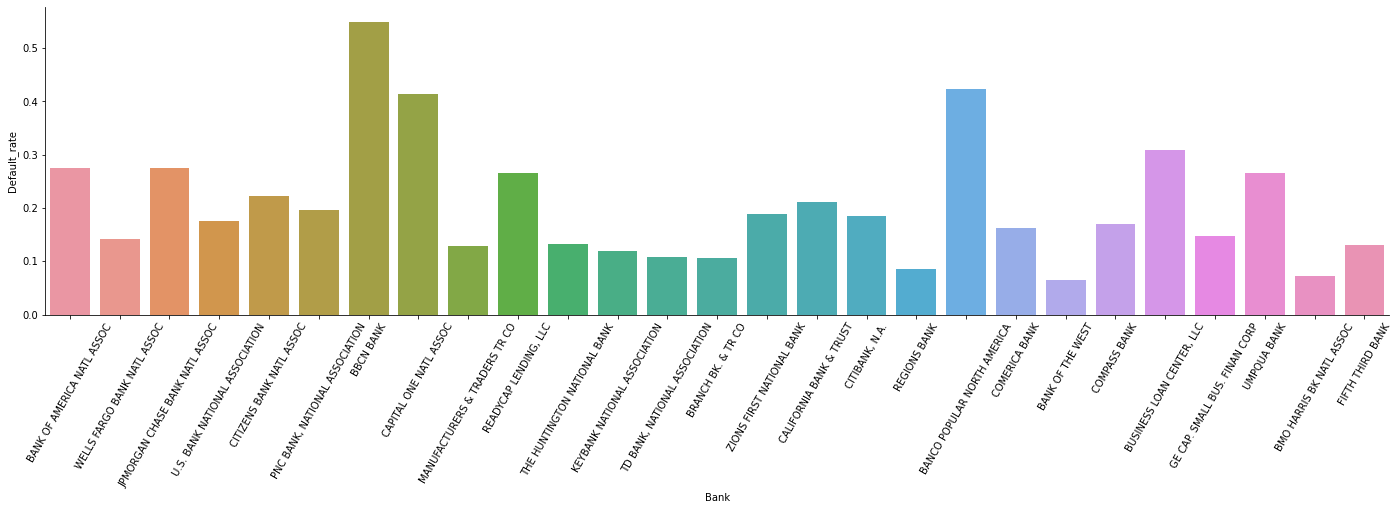

In [ ]:
group_bank_5000=group_bank[group_bank['Amount_of_loans']>4999];
print(group_bank_5000.info());
# There are 27 banks with 5000 or more loans, now it is more reasonable to make 
#a plot by putting the bank on the x-axis.
print("----------------------------------------------")
g=sns.catplot( data=group_bank_5000, x="Bank", y="Default_rate", kind="bar", aspect=4);
g.set_xticklabels(rotation=60);

We see that the delinquency rate is closely related to the bank, although we are not sure if this will help us to build a predictive model due to the large number of banks.

One thing one might be tempted to do is look at banks by state where they are located. But it would be a mistake to look at things this way because the data we have (the 'BankState' field) is the state where the **branch** of the bank that made the loan is located. That is, each 'bank is in many states. For example:

In [ ]:
loans[loans['Bank']=='BANK OF AMERICA NATL ASSOC'][['Bank', 'BankState']].head(15)

,Bank,BankState
11,BANK OF AMERICA NATL ASSOC,OR
15,BANK OF AMERICA NATL ASSOC,NC
17,BANK OF AMERICA NATL ASSOC,MD
22,BANK OF AMERICA NATL ASSOC,RI
26,BANK OF AMERICA NATL ASSOC,NC
45,BANK OF AMERICA NATL ASSOC,MA
51,BANK OF AMERICA NATL ASSOC,MA
53,BANK OF AMERICA NATL ASSOC,RI
66,BANK OF AMERICA NATL ASSOC,WA
73,BANK OF AMERICA NATL ASSOC,NC


So the idea of grouping banks by "their" state doesn't make sense.

Another idea we can explore is this: In a way, the amount of a bank's loans is a measure of how important it is. Will the default rate depend on how important it is? Or in terms of our data, is there a correlation between the default rate and the number of loans each bank took out?

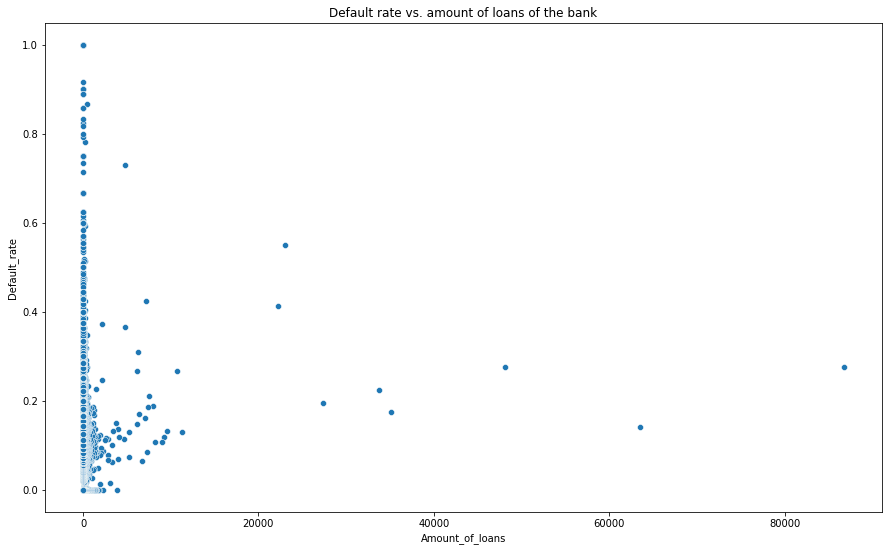

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax=sns.scatterplot(x=group_bank['Amount_of_loans'], y=group_bank['Default_rate']);
ax.set(xlabel='Amount_of_loans', ylabel='Default_rate',title = 'Default rate vs. amount of loans of the bank') ;

There doesn't seem to be much of a correlation. Let's limit the amount of loans to see if we can see something.

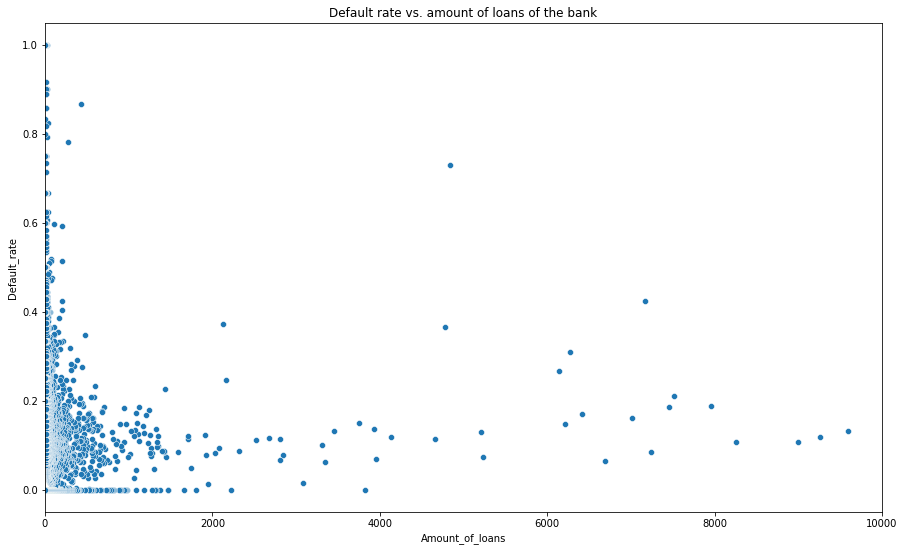

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax=sns.scatterplot(x=group_bank['Amount_of_loans'], y=group_bank['Default_rate']);
ax.set(xlabel='Amount_of_loans', ylabel='Default_rate',title = 'Default rate vs. amount of loans of the bank') ;
ax.set_xlim(0,10000);

You can't really tell much. If we look at it in more statistical terms, with the correlation coefficient:

In [ ]:
group_bank['Amount_of_loans'].corr(group_bank['Default_rate'])

0.0014686859192730346

We see that there is effectively no correlation, so this idea is not going to work for us. Maybe later we can think of some way to simplify the information about banks.

#### States

We ask ourselves how much is the incidence of the company's state of origin in the repayment of the loans.



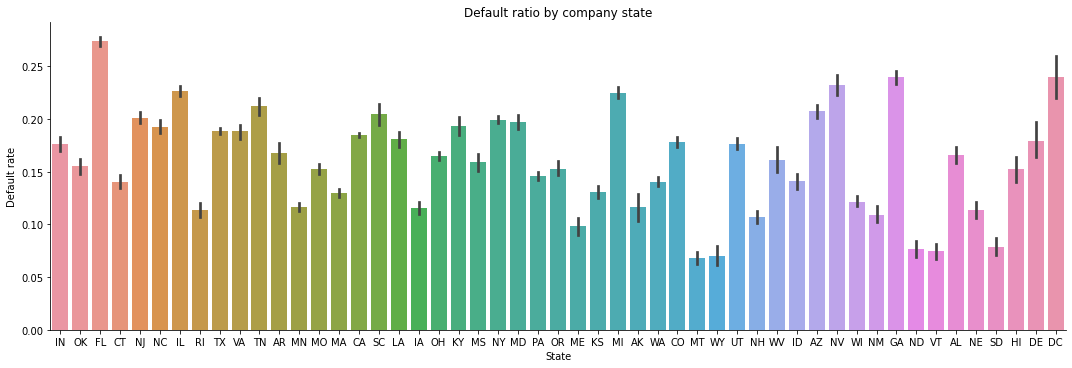

In [ ]:
sns.catplot( data=loans, x="State", y="Default", kind="bar", aspect=3); # On the y-axis plots an average of Default. That is, the default ratio.
plt.ylabel('Default rate');
plt.title("Default ratio by company state");

We see that there are states where the risk of default is significantly higher than in others. This may be due to employment laws, the wealth of the state, and cultural factors.

Will the same happen with the state of the bank branch?

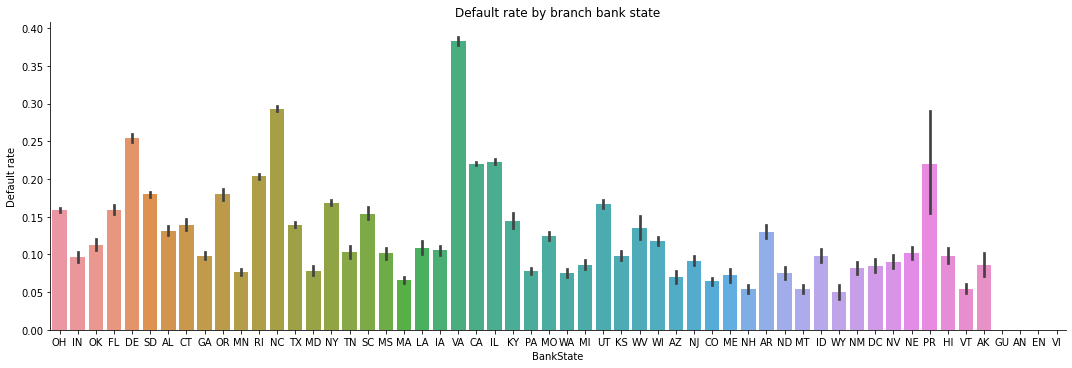

In [ ]:
sns.catplot( data=loans, x="BankState", y="Default", kind="bar", aspect=3); 
plt.ylabel('Default rate');
plt.title("Default rate by branch bank state");

It is interesting to see that the differences in the default rate with respect to the status of the bank branch is even greater than the differences regarding the status of the company. For example, if the bank is from VA (Virginia) the drawbacks are around 40%. A really high value.

But we have to be a bit careful because if you look at the state of the company and the state of the branch bank, the default rate in most of these combinations is calculated based on too few values to draw statistically reliable conclusions.

In [ ]:
# We hide the tables because there are too big and too complicated to understand for a non-technical audience.

# pivot_state=loans.pivot_table(index='State', columns=['BankState'], values=['Default'], aggfunc='mean', margins = True, margins_name='Total default rate')
# print(pivot_state)
# print('----------------------------------------------------')
# pivot_state=loans.pivot_table(index='State', columns=['BankState'], values=['Default'], aggfunc='count', margins = True, margins_name='Total counts')
# print(pivot_state)

Perhaps it is more useful to consider whether the state of the company is the same as the state of the branch bank or not.

In [ ]:
loans['SameState']=loans['State'].eq(loans['BankState']) #We create a new field which indicates if both states are equal or not.


In [ ]:
print(f"There are {loans[loans['SameState']==True]['Default'].count()} loans where the state of the company is equal to the state of the branch bank. The\n corresponding default rate in this case is: {loans[loans['SameState']==True]['Default'].mean()*100}%.")
print(f"There are {loans[loans['SameState']==False]['Default'].count()} loans where the state of the company is different than the state of the branch bank. The\n corresponding default rate in this case is: {loans[loans['SameState']==False]['Default'].mean()*100}%.")

There are 473358 loans where the state of the company is equal to the state of the branch bank. The
 corresponding default rate in this case is: 10.516142116537589%.
There are 423714 loans where the state of the company is different than the state of the branch bank. The
 corresponding default rate in this case is: 25.436497259944208%.


The default rate when the state of the branch bank is different from that of the company is 2.5 times higher! This is definitely an important fact to keep in mind.

If we break down the state of the branch bank according to whether it is different from that of the company requesting the loan, we can see the following:

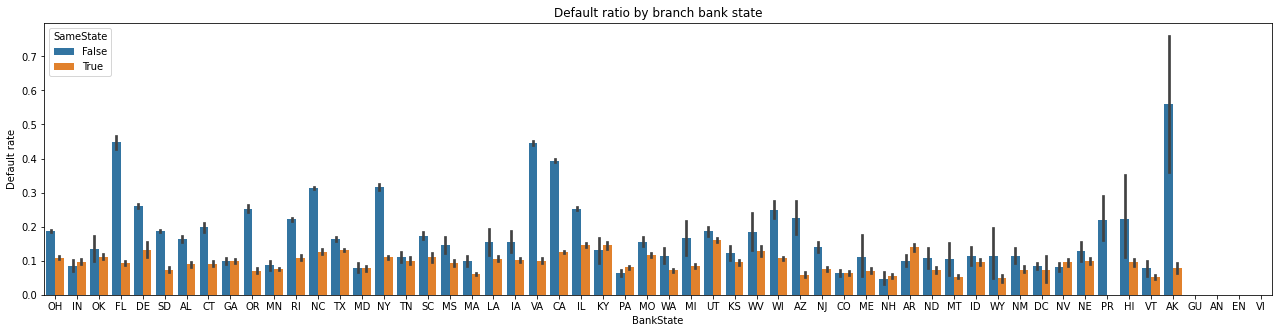

In [ ]:
ax=sns.barplot(y='Default', x='BankState', data=loans, hue='SameState')
ax.figure.set_size_inches(22,5)
plt.ylabel('Default rate');
plt.title("Default ratio by branch bank state");

 

Here we see again the great difference that there is if the bank branch is in the same state or not. We notice that there are some states ('GU', 'AN', 'EN', 'VI') that do not have bars, but that is because they have very few loans and the default rate is not calculated:

In [ ]:
loans['BankState'].value_counts()

CA    118014
NC     79449
IL     65855
OH     58425
SD     51065
TX     47758
RI     44115
NY     39544
VA     28959
DE     24520
MN     19950
UT     18994
PA     17036
WI     15402
MO     14840
MA     13843
GA     13805
FL     13803
AL     12127
OR     11369
WA     10687
CO     10580
CT      9905
IA      9860
NJ      9434
KS      8869
MT      7848
IN      7618
SC      7471
MI      7365
OK      7322
MD      6993
NH      6794
AR      6311
MS      5923
TN      5619
NE      5333
ND      5103
LA      5057
VT      4751
NM      4416
KY      4380
NV      4323
ID      4313
DC      4003
AZ      3957
ME      3689
HI      2989
WY      2167
WV      2006
AK      1438
PR       155
GU         5
AN         1
EN         1
VI         1
Name: BankState, dtype: int64

Continuing observing the graph above, we understand that it is more important if the state of the bank branch is equal to that of the company than the state of the branch itself.

#### Business sector

And what happens with the industry sector? Will the default rate depend a lot on the sector?

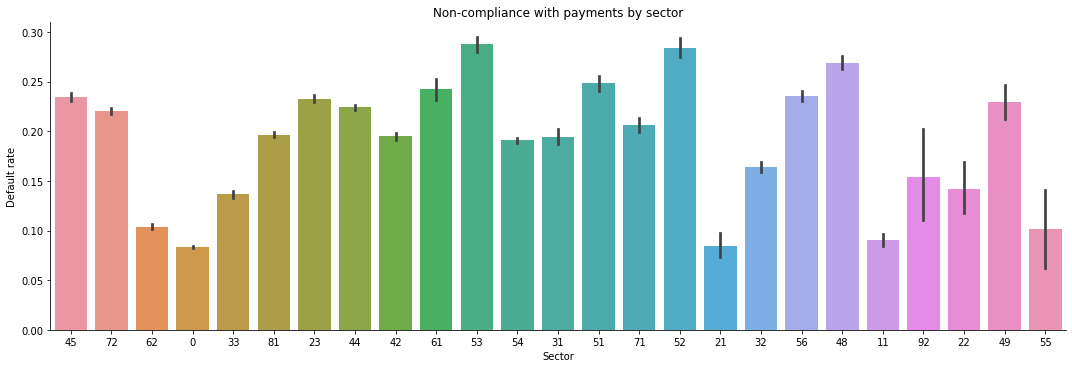

In [ ]:
sns.catplot( data=loans, x="Sector", y="Default", kind="bar", aspect=3); # On the y-axis plots an average of Default. That is, the default ratio.
plt.title("Non-compliance with payments by sector");
plt.ylabel('Default rate');


(The lines over the bars indicate a 95% confidence interval of the mean assuming random sampling).

To understand this better, let's remember the table with the sector codes.

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

We see that there are sectors such as 52 and 53 ("Finance and insurance" and "Real estate and rental and leasing", respectively) where the default rate is close to 30%, while other sectors such as 11 and 21 (" Agriculture, forestry, fishing and hunting" and "Mining, quarrying, and oil and gas extraction", respectively) where the percentage is less than 10%.

It would also be interesting to know if, when considering the subsector, we obtain additional information.

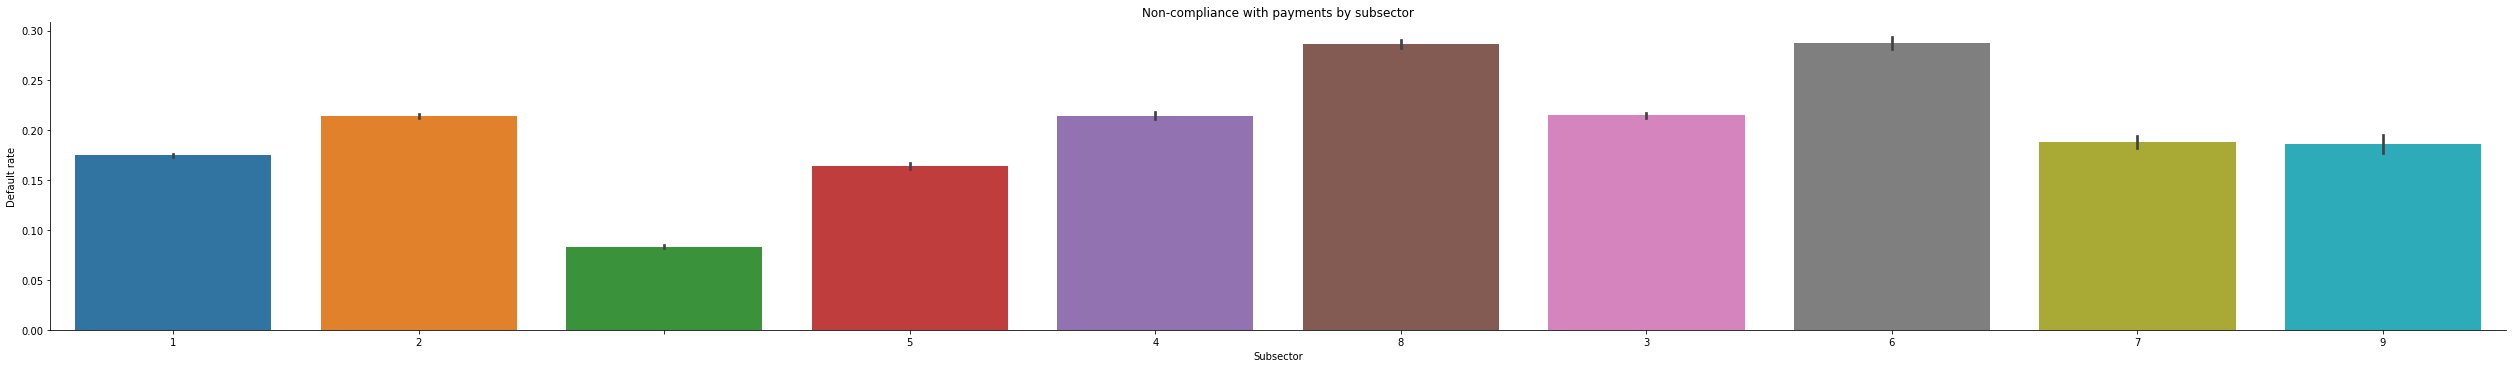

In [ ]:
sns.catplot( data=loans, x="Subsector", y="Default", kind="bar", aspect=7); # On the y-axis plots an average of MIS_Status_numeric. That is, the default ratio.
plt.title("Non-compliance with payments by subsector");
plt.ylabel('Default rate');


Apparently it seems so. Let's look more in detail taking into account also the sector.

In [ ]:
pivot_NAICS=loans.pivot_table(index='Sector', columns=['Subsector'], values=['Default'], aggfunc='mean', margins = True, margins_name='Total default rate')
pivot_NAICS

Default                                          \
Subsector                            1         2         3         4   
Sector                                                                 
0                   0.083305       NaN       NaN       NaN       NaN   
11                       NaN  0.086266  0.049013  0.125370  0.268487   
21                       NaN  0.061224  0.134216  0.065359       NaN   
22                       NaN  0.141994       NaN       NaN       NaN   
23                       NaN       NaN       NaN  0.125332  0.076393   
31                       NaN  0.176451  0.111338  0.157791  0.158367   
32                       NaN  0.182685  0.106115  0.202131  0.109145   
33                       NaN  0.112446  0.111999  0.110547  0.105315   
42                       NaN  0.078499  0.087224  0.291095  0.320243   
44                       NaN  0.199256  0.270302  0.246620  0.195326   
45                       NaN  0.199734  0.301056  0.256060  0.196550   
48                       NaN  0.244726  0.156863  0.127389  0.282701   
49                       NaN  0.215873  0.287136  0.110357       NaN   
51                       NaN  0.254198  0.229285  0.162963  0.220063   
52                       NaN       NaN  0.425000  0.286102  0.213929   
53                       NaN  0.362923  0.175075  0.088608       NaN   
54                       NaN  0.190774       NaN       NaN       NaN   
55                       NaN  0.101562       NaN       NaN       NaN   
56                       NaN  0.243212  0.128440       NaN       NaN   
61                       NaN  0.242462       NaN       NaN       NaN   
62                       NaN  0.093812  0.115538  0.107798  0.138915   
71                       NaN  0.299556  0.300752  0.183632       NaN   
72                       NaN  0.069133  0.242694       NaN       NaN   
81                       NaN  0.165224  0.232850  0.209571  0.085366   
92                       NaN  0.368421  0.170213  0.129032  0.067797   
Total default rate  0.083305  0.175120  0.214337  0.215052  0.214697   

                                                                      \
Subsector                  5         6         7         8         9   
Sector                                                                 
0                        NaN       NaN       NaN       NaN       NaN   
11                  0.097440       NaN       NaN       NaN       NaN   
21                       NaN       NaN       NaN       NaN       NaN   
22                       NaN       NaN       NaN       NaN       NaN   
23                  0.094450  0.383147  0.165874  0.301926       NaN   
31                  0.314682  0.218914       NaN       NaN       NaN   
32                  0.115454  0.138232  0.159464       NaN       NaN   
33                  0.111561  0.167544  0.193479       NaN  0.180054   
42                  0.316119       NaN       NaN       NaN       NaN   
44                  0.210902  0.216729  0.172618  0.272093       NaN   
45                       NaN       NaN       NaN       NaN       NaN   
48                  0.239856  0.235294  0.203593  0.259159       NaN   
49                       NaN       NaN       NaN       NaN       NaN   
51                  0.296651  0.383117  0.350000  0.196532  0.316623   
52                  0.232394       NaN       NaN       NaN       NaN   
53                       NaN       NaN       NaN       NaN       NaN   
54                       NaN       NaN       NaN       NaN       NaN   
55                       NaN       NaN       NaN       NaN       NaN   
56                       NaN       NaN       NaN       NaN       NaN   
61                       NaN       NaN       NaN       NaN       NaN   
62                       NaN       NaN       NaN       NaN       NaN   
71                       NaN       NaN       NaN       NaN       NaN   
72                       NaN       NaN       NaN       NaN       NaN   
81                       NaN       NaN       NaN       NaN  

The values that can be seen in the table are the default rates by sector and subsector. In the 'Total default rate' column we can see the default rate for each sector, and in the 'Total default rate' row we can see the default rate for each subsector. The latter makes sense if the subsectors do not depend on the sector, but this is not true. That is, the last row doesn't really have any useful information.

We wonder if all the places in the table have a reasonable number of records, in the sense that if there are very few, the percentage of default can be very random and unrepresentative. Let's see a table with the number of records in each sector and subsector.

In [ ]:
loans.pivot_table(index='Sector', columns=['Subsector'], values=['Default'], aggfunc='count', margins = True, margins_name='Total values')

Default                                                 \
Subsector                      1         2        3        4        5   
Sector                                                                  
0             201657.0       NaN       NaN      NaN      NaN      NaN   
11                 NaN     881.0    4815.0   1013.0    879.0   1406.0   
21                 NaN      98.0     529.0   1224.0      NaN      NaN   
22                 NaN     662.0       NaN      NaN      NaN      NaN   
23                 NaN       NaN       NaN   4516.0   1741.0  19587.0   
31                 NaN    6132.0     979.0   1014.0   1004.0   2091.0   
32                 NaN    2726.0    1112.0   6006.0    339.0   2789.0   
33                 NaN    1165.0    9884.0   7481.0   4064.0   1730.0   
42                 NaN   14255.0    9573.0  14655.0   9549.0    639.0   
44                 NaN   11824.0    7647.0   5770.0   7403.0  21868.0   
45                 NaN   12767.0    3315.0  20296.0   6029.0      NaN   
48                 NaN     237.0      51.0    157.0  12897.0   2785.0   
49                 NaN     315.0    1306.0    589.0      NaN      NaN   
51                 NaN    2561.0    3524.0    675.0   1595.0    209.0   
52                 NaN       NaN    2640.0   1475.0   5212.0    142.0   
53                 NaN    8156.0    5352.0     79.0      NaN      NaN   
54                 NaN   67918.0       NaN      NaN      NaN      NaN   
55                 NaN     256.0       NaN      NaN      NaN      NaN   
56                 NaN   30348.0    2180.0      NaN      NaN      NaN   
61                 NaN    6401.0       NaN      NaN      NaN      NaN   
62                 NaN   41999.0     251.0   1308.0  11705.0      NaN   
71                 NaN    2704.0     133.0  11779.0      NaN      NaN   
72                 NaN    8650.0   58856.0      NaN      NaN      NaN   
81                 NaN   38469.0   33236.0    606.0     82.0      NaN   
92                 NaN      19.0      47.0     31.0     59.0      4.0   
Total values  201657.0  258543.0  145430.0  78674.0  62558.0  53250.0   

                                                              
Subsector           6        7        8       9 Total values  
Sector                                                        
0                 NaN      NaN      NaN     NaN       201657  
11                NaN      NaN      NaN     NaN         8994  
21                NaN      NaN      NaN     NaN         1851  
22                NaN      NaN      NaN     NaN          662  
23            11155.0   1893.0  27573.0     NaN        66465  
31              571.0      NaN      NaN     NaN        11791  
32             1946.0   2985.0      NaN     NaN        17903  
33             2280.0   4171.0      NaN  7420.0        38195  
42                NaN      NaN      NaN     NaN        48671  
44             6635.0   7786.0  15627.0     NaN        84560  
45                NaN      NaN      NaN     NaN        42407  
48               34.0    334.0   3685.0     NaN        20180  
49                NaN      NaN      NaN     NaN         2210  
51              154.0   1400.0    865.0   379.0        11362  
52                NaN      NaN      NaN     NaN         9469  
53                NaN      NaN      NaN     NaN        13587  
54                NaN      NaN      NaN     NaN        67918  
55                NaN      NaN      NaN     NaN          256  
56                NaN      NaN      NaN     NaN        32528  
61                NaN      NaN      NaN     NaN         6401  
62                NaN      NaN      NaN     NaN        55263  
71                NaN      NaN      NaN     NaN        14616  
72                NaN      NaN      NaN     NaN        67506  
81                NaN      NaN      NaN     NaN        72393  
92               30.0      1.0     36.0     NaN          227  
Total values  22805.0  18570.0  47786.0  7799.0       897072

Let's see some cases with very few records, for example in sector 92. But it is not the general rule. So in general, the default rates in the table above are not due to random fluctuations.

Let's see graphically how is the default rate for all sectors along with their subsectors.

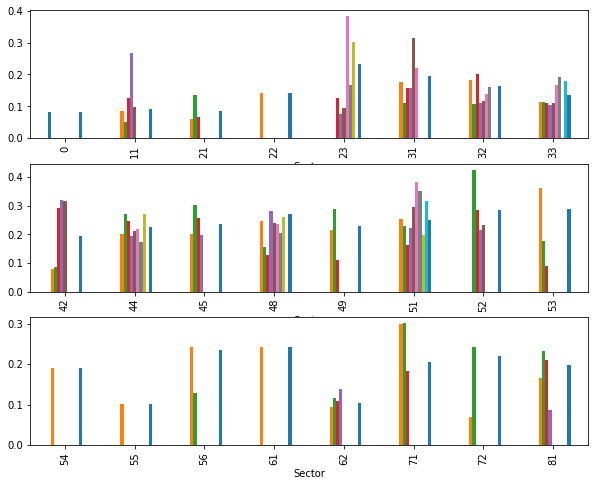

In [ ]:
pivot_NAICS_simple = pivot_NAICS['Default'] # We remove the multiindex to simplify.
fig, ax = plt.subplots(nrows=3, ncols=1)
pivot_NAICS_simple.iloc[0:8].plot.bar(figsize=(10,8), ax=ax[0],legend=None);
pivot_NAICS_simple.iloc[8:16].plot.bar(figsize=(10,8), ax=ax[1],legend=None);
pivot_NAICS_simple.iloc[16:24].plot.bar(figsize=(10,8), ax=ax[2],legend=None);

We see some differences. Later (in the feature engineering section) we will check how much predictive value it provides.

#### Companies with several loans

Let's analyze if the loans of recurring debtors have significant differences in the default rate.

               Default_rate  Number_of_loans
Several_loans                               
False              0.184293           706480
True               0.143542           190592


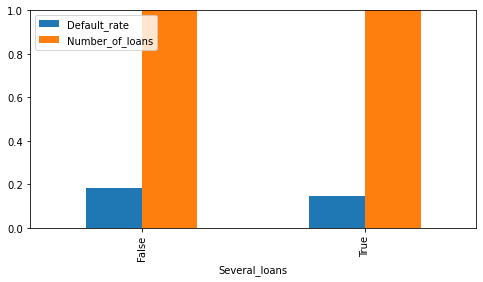

In [ ]:
#We are going to create a new field called 'Several_loans', which will be True 
#if the company took several loans, and False if not.
loans['Several_loans']=loans['Name'].duplicated(keep=False)

g=loans.groupby(['Several_loans']).agg(Default_rate=('Default', 'mean'), Number_of_loans=('Default', 'count'))
print(g)
g.plot.bar(figsize=(8, 4))
plt.legend(loc='upper left')
plt.ylim((0,1));

We see there is not much difference between the companies that took several loans and those that did not. The difference is around 4%, and contrary to what one might think, companies that have taken out several loans are (slightly) more compliant. This difference allows us to infer that it is really more likely that the loans from repeat offenders are more likely to be repaid than the others? A hypothesis test can be done to see if this difference is statistically significant or is simply a product of chance.

In [ ]:
sample_0 = loans[loans['Several_loans']==True]['Default']
sample_1 = loans[loans['Several_loans']==False]['Default']
ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.0
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


This difference is not due to chance. It would be necessary to see in the Feature Engineering section how predictive it is. 